<style type="text/css">
.time_spent {
    width: 3em;
    border-style: none;
    background-color: silver;
    font-weight: bold;
    padding-left: 5px;
}
</style>

In [ ]:
#Team Saikiran and Sabeeh

# [WS14/15] Mathematics for Robotics and Control: Assignment 003 - Eigenfaces

First we will setup this notebook so that figures and plots can be shown in the notebook page.

In [2]:
try:
    shell = get_ipython()
    shell.enable_pylab("inline")
except NameError:
    pass


import scipy.spatial as sp
import numpy
import matplotlib
from matplotlib import pylab, mlab, pyplot
np = numpy
plt = pyplot
            
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
import IPython
from pylab import *
from numpy import *

---

**Hint**: Before you start solving the assignment, you might want to check the following *numpy* functions:

```
PIL.Image.open
scipy.misc.imresize
scipy.spatial.distance
numpy.linalg.eigh
```

## Eigenfaces

Eigenvectors have many applications which are not limited to obtaining surface normals from a set of point clouds. In this assignment, you are asked to write your own little facial recognition library. Take a look at the following image:

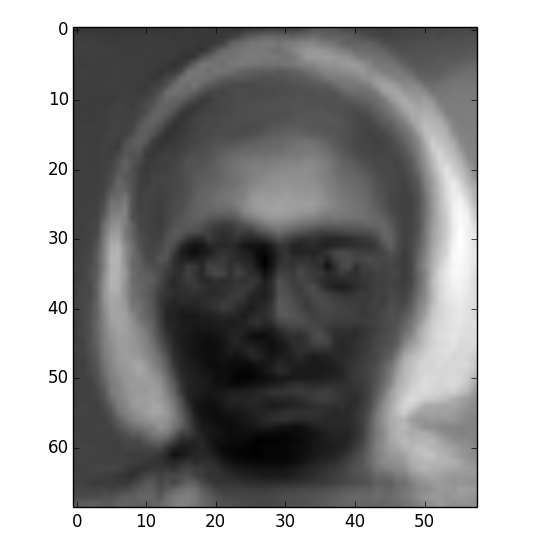

In [13]:
IPython.core.display.Image("images/ef0001.png")

This is what is called an *eigenface*. An eigenface really is nothing else than an eigenvector, in this case reshaped for plotting. Eigenfaces can be used in facial recognition, allowing a robot to distinguish between different persons, but it can also be applied to other use cases such as voice or gesture recognition.

1. **Read the [Wikipedia article](http://en.wikipedia.org/wiki/Eigenface) about Eigenfaces.**
2. **Implement the eigenface algorithm described in the Wikipedia article in a Python object (a class) that exposes (at least) two methods:**
    1. **A method calculating eigenfaces given a number of images and a subject id uniquely identifying the subject in the picture as parameters. **
    2. **A method returning the subject id of the most similar face, for each face in a list of query faces given as parameter.**

Use the signatures shown below for your implementation.

**Hint:** You might want to research how Principal Component Analysis (PCA) works.

In [12]:
class FaceRecognition(object):
    
    # mean variable must be global since it's common in both the functions
    #please make sure the path is aligned to the code accordingly
    
    
    def enroll_faces(self, image_filenames, subject_ids):
        allimagematrix = np.asarray([np.array(Image.open("/home/saikiran/HBRS/MRC/week3/MRC_A_003/data/training/%s" % name)).flatten() for name in image_filenames])
        subjects = subject_ids #only one single_subject ID as mentioned in the method description.
        
        #calculating mean and substract from all the images
        mean = allimagematrix.mean(axis = 0)
        mean_all = mean
        imagesminmean = allimagematrix - mean_all
        
        
        #calculating eigen vectors using SVD 
        U,S,V = np.linalg.svd(imagesminmean.T,full_matrices=0)
        eigenvect = U
        
        #calculating weights 
        w = np.dot(imagesminmean,U)
        
        weights = w
        
        return mean_all,eigenvect,weights
        
        raise NotImplementedError() # ʕ •ᴥ•ʔ
        
    def recognize_face(self, image_filenames,mean_all,eigenvect,weights):
        
        #please make sure to align the path
        testimagematrix = np.asarray([np.array(Image.open("/home/saikiran/HBRS/MRC/week3/MRC_A_003/data/test/%s" % name)).flatten() for name in image_filenames])
        
        testimageminmean = testimagematrix - mean_all
        
        w_t = np.dot(testimageminmean,eigenvect)
        n1, n2 = weights.shape
        
        dist = np.empty(n1)

        for i in range(n1):
            dist[i] = (sp.distance.euclidean(weights[i],w_t))
            
        index = np.argmin(dist)
        print ("test image similar to %s" %subject[index])
        

        raise NotImplementedError() # ʕ •ᴥ•ʔ